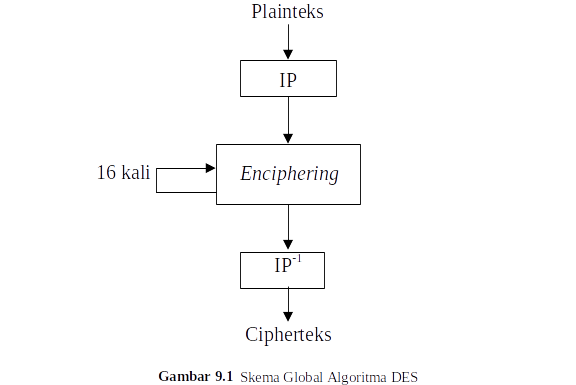

In [ ]:
'''
Asumsi :
Plaintext dan key merupakan hexadecimal 0-F dengan panjang 16
'''

plaintext = '87878787878787878'
# key = '0e329232ea6d0d73'

# ubah plaint text dari hexa ke binary
def hex2bits(text):
    #fungsi convert hexadecimal ke binary digits
    text = list(text)
    bits = str()
    for char in text:
        char_bits = '{0:04b}'.format(int(char, 16))
        bits += char_bits
    return bits

#Binary Digits
PT = hex2bits(plaintext)
print('hasil dari convert hexadecimal to binary bits:\n',PT)
print('sejumlah 64 bit')




hasil dari convert hexadecimal to binary bits:
 10000111100001111000011110000111100001111000011110000111100001111000
sejumlah 64 bit


## Initial Permutasi dari plaintext

In [ ]:
# array yang menampung tabel IP
IP = [
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
    64, 56, 48, 40, 32, 24, 16, 8,
    57, 49, 41, 33, 25, 17, 9,  1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7
]

#buat function untuk permutasi (karena akan sering digunakan)
def permutation(pt, ip):
    # fungsi permutation block
    # pt: binary digits
    # ip: permutation block
    permuted = [list(pt)[i-1] for i in ip]
    print(permuted)
    return ''.join(permuted)

#permutasikan plaintext dengan IP
PT = permutation(PT, IP)

print('hasil dari permutasi :\n', PT)


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1']
hasil dari permutasi :
 0000000000000000111111111111111111111111000000000000000011111111


# **Langkah 2**
#pecah hasil permutasi PlainText dengan IP menjadi 2

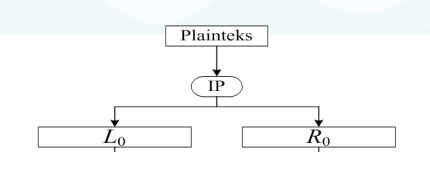

In [ ]:
# Langkah 2 pecah hasil permutasi PlainText dengan IP menjadi 2
R_list = [] # untuk menampung nilai hasil pemecahan kanan dari binary setiap putaran
L_list = [] # untuk menampung nilai hasil pemecahan kiri dari binary setiap putaran

def split_half(bits):
    # split binary digits menjadi dua bagian sama besar
    s = int(len(bits)/2)
    print("hasil pembagian digits :",s)
    L = bits[:s]
    R = bits[s:]
    return L, R

L_n, R_n = split_half(PT)
print("sisi kiri :", L_n)
print("sisi kanan :", R_n)

L_list.append(L_n)
R_list.append(R_n)
print('L_n pertama: ', L_list)
print('R_n pertama: ', R_list)


hasil pembagian digits : 32
sisi kiri : 00000000000000001111111111111111
sisi kanan : 11111111000000000000000011111111
L_n pertama:  ['00000000000000001111111111111111']
R_n pertama:  ['11111111000000000000000011111111']


# **Break**


*   Berhenti dahulu proses untuk permutasi plaintext
*   Lanjutkan untuk pembangkitan kunci

# **#Skema untuk membangkitkan kunci eksternal**

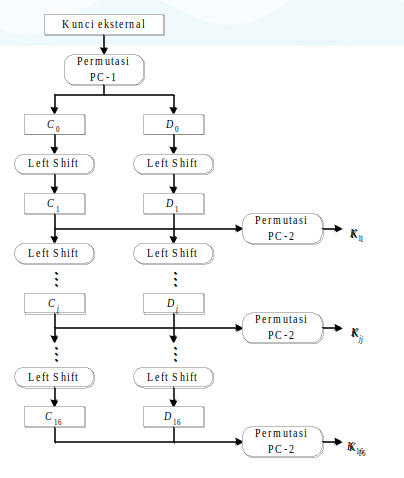

# **Langkah 3 dan 4 (ubah key menjadi binary dan mutasikan dengan PC1)**

In [ ]:
# masukan key yang akan di acuan untuk dibangkitkan
key = '0e329232ea6d0d73'

#ubah key dari hexa ke binary
K = hex2bits(key)

# buat variabel array untuk menampung Kunci dari setiap putaran
K_list = []

#deklarasi tabel PC1
PC1 = [
    57, 49, 41, 33, 25, 17, 9,
    1,  58, 50, 42, 34, 26, 18,
    10, 2,  59, 51, 43, 35, 27,
    19, 11, 3,  60, 52, 44, 36,
    63, 55, 47, 39, 31, 23, 15,
    7,  62, 54, 46, 38, 30, 22,
    14, 6,  61, 53, 45, 37, 29,
    21, 13, 5,  28, 20, 12, 4
]

#dimutasikan antara key dan tabel PC1 (dengan memanggil function permutation yang sudah dibuat tadi)
K_plus = permutation(K, PC1)

print('hasil permutasi key dengan tabel PC1 : ', K_plus)



['0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0']
hasil permutasi key dengan tabel PC1 :  00010100101100001011101010001001111101100001011100011110


# **Langkah 5 (Bagi menjadi 2 dari hasil permutation key dengan PC1)**



In [ ]:
# buat variabel untuk menampung sisi kiri dan kanan dari PC1
C_list = []
D_list = []

n_rounds = 16 #adalah jumlah perputaran yang akan di lakukan

print('dibagi menjadi 2')
C_n, D_n = split_half(K_plus)

C_list.append(C_n)
print('sisi kiri : ', C_list)
D_list.append(D_n)
print('sisi kanan : ', D_list)

dibagi menjadi 2
hasil pembagian digits : 28
sisi kiri :  ['0001010010110000101110101000']
sisi kanan :  ['1001111101100001011100011110']


# **Langkah 6 dan 7**
### 6. Selanjutnya, kedua bagian digeser ke kiri (left shift) sepanjang satu atau dua bit bergantung pada tiap putaran
### 7. gabung antara C_i + D_i agar dapa di mutasikan ke PC2
### 8. mutasikan antara C_i+D_i dengan PC2

In [ ]:
#table dari PC2
PC2 = [
    14, 17, 11, 24, 1,  5,
    3,  28, 15, 6,  21, 10,
    23, 19, 12, 4,  26, 8,
    16, 7,  27, 20, 13, 2,
    41, 52, 31, 37, 47, 55,
    30, 40, 51, 45, 33, 48,
    44, 49, 39, 56, 34, 53,
    46, 42, 50, 36, 29, 32
]

# buat function untuk melakukan pergeseran lebih mudah
def rotate(bits, shift = 1):
    # fungsi left shift
    return bits[shift:]+bits[:shift]

#Generate C_n, D_n, 1<=n<=n_rounds
# 6. proses pergeseran nilai C_i dan D_i
print('====proses pergeseran bit pada setiap perputaran====')
for i in range(n_rounds):
    if (i == 0) or (i == 1) or (i == 8) or (i == 15):
        C_n = rotate(C_n, 1)
        D_n = rotate(D_n, 1)
    else:
        C_n = rotate(C_n, 2)
        D_n = rotate(D_n, 2)

    C_list.append(C_n)
    D_list.append(D_n)

    #7. gabung antara C_i + D_i agar dapa di mutasikan ke PC2
    #Generate K_n, 1<=n<=n_rounds
    concat = C_n + D_n

    # 8. mutasikan antara C_i+D_i dengan PC2
    #masuk ke permutasi dengan PC2
    K_n = permutation(concat, PC2)

    K_list.append(K_n)

print('hasil pergeseran C_n: ', C_list)
print('hasil pergeseran D_n: ', D_list)
# print('hasil permutasi key dengan tabel PC2 : ', K_n)

subkeys = K_list
print('hasil dari key yang dibangkitkan :\n', subkeys)

====proses pergeseran bit pada setiap perputaran====
['0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1']
['0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1']
['0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1']
['1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0'

# **Proses Enchipering**

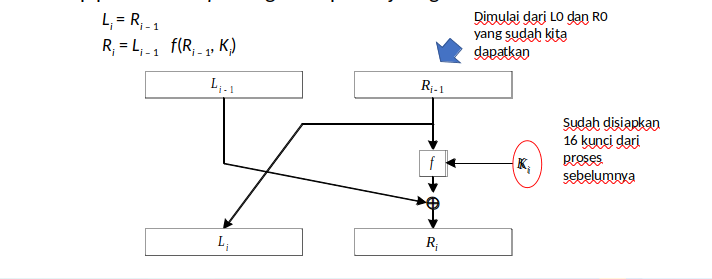

# **Langkah-Langkahnya**

### table ekspansi

In [ ]:
E  = [
    32, 1,  2,  3,  4,  5,
    4,  5,  6,  7,  8,  9,
    8,  9,  10, 11, 12, 13,
    12, 13, 14, 15, 16, 17,
    16, 17, 18, 19, 20, 21,
    20, 21, 22, 23, 24, 25,
    24, 25, 26, 27, 28, 29,
    28, 29, 30, 31, 32, 1
]

### Table S-Box

In [ ]:
Sboxes = {
    0: [
        14,  4, 13,  1,  2, 15, 11,  8,  3, 10,  6, 12,  5,  9,  0,  7,
        0, 15,  7,  4, 14,  2, 13,  1, 10,  6, 12, 11,  9,  5,  3,  8,
        4,  1, 14,  8, 13,  6,  2, 11, 15, 12,  9,  7,  3, 10,  5,  0,
        15, 12,  8,  2,  4,  9,  1,  7,  5, 11,  3, 14, 10,  0,  6, 13
    ],
    1: [
        15,  1,  8, 14,  6, 11,  3,  4,  9,  7,  2, 13, 12,  0,  5, 10,
        3, 13,  4,  7, 15,  2,  8, 14, 12,  0,  1, 10,  6,  9, 11,  5,
        0, 14,  7, 11, 10,  4, 13,  1,  5,  8, 12,  6,  9,  3,  2, 15,
        13,  8, 10,  1,  3, 15,  4,  2, 11,  6,  7, 12,  0,  5, 14,  9
    ],
    2: [
        10,  0,  9, 14,  6,  3, 15,  5,  1, 13, 12,  7, 11,  4,  2,  8,
        13,  7,  0,  9,  3,  4,  6, 10,  2,  8,  5, 14, 12, 11, 15,  1,
        13,  6,  4,  9,  8, 15,  3,  0, 11,  1,  2, 12,  5, 10, 14,  7,
        1, 10, 13,  0,  6,  9,  8,  7,  4, 15, 14,  3, 11,  5,  2, 12
    ],
    3: [
        7, 13, 14,  3,  0,  6,  9, 10,  1,  2,  8,  5, 11, 12,  4, 15,
        13,  8, 11,  5,  6, 15,  0,  3,  4,  7,  2, 12,  1, 10, 14,  9,
        10,  6,  9,  0, 12, 11,  7, 13, 15,  1,  3, 14,  5,  2,  8,  4,
        3, 15,  0,  6, 10,  1, 13,  8,  9,  4,  5, 11, 12,  7,  2, 14
    ],
    4: [
        2, 12,  4,  1,  7, 10, 11,  6,  8,  5,  3, 15, 13,  0, 14,  9,
        14, 11,  2, 12,  4,  7, 13,  1,  5,  0, 15, 10,  3,  9,  8,  6,
        4,  2,  1, 11, 10, 13,  7,  8, 15,  9, 12,  5,  6,  3,  0, 14,
        11,  8, 12,  7,  1, 14,  2, 13,  6, 15,  0,  9, 10,  4,  5,  3
    ],
    5: [
        12,  1, 10, 15,  9,  2,  6,  8,  0, 13,  3,  4, 14,  7,  5, 11,
        10, 15,  4,  2,  7, 12,  9,  5,  6,  1, 13, 14,  0, 11,  3,  8,
        9, 14, 15,  5,  2,  8, 12,  3,  7,  0,  4, 10,  1, 13, 11,  6,
        4,  3,  2, 12,  9,  5, 15, 10, 11, 14,  1,  7,  6,  0,  8, 13
    ],
    6: [
        4, 11,  2, 14, 15,  0,  8, 13,  3, 12,  9,  7,  5, 10,  6,  1,
        13,  0, 11,  7,  4,  9,  1, 10, 14,  3,  5, 12,  2, 15,  8,  6,
        1,  4, 11, 13, 12,  3,  7, 14, 10, 15,  6,  8,  0,  5,  9,  2,
        6, 11, 13,  8,  1,  4, 10,  7,  9,  5,  0, 15, 14,  2,  3, 12
    ],
    7: [
        13,  2,  8,  4,  6, 15, 11,  1, 10,  9,  3, 14,  5,  0, 12,  7,
        1, 15, 13,  8, 10,  3,  7,  4, 12,  5,  6, 11,  0, 14,  9,  2,
        7, 11,  4,  1,  9, 12, 14,  2,  0,  6, 10, 13, 15,  3,  5,  8,
        2,  1, 14,  7,  4, 10,  8, 13, 15, 12,  9,  0,  3,  5,  6, 11
    ]
}

### table P-BOX

In [ ]:
#table P-BOX
P = [
    16,  7, 20, 21,
    29, 12, 28, 17,
    1, 15, 23, 26,
    5, 18, 31, 10,
    2,  8, 24, 14,
    32, 27,  3,  9,
    19, 13, 30,  6,
    22, 11, 4,  25
]


### function XOR

In [ ]:
# buat function xor supaya mempermudah untuk setiap perputaran ciphering dan pemanggilan xor di dalam feistel
def xor(Left, Right):
    # fungsi xor dari dua string yang hanya berisi nol atau satu
    L_int = [int(i) for i in list(Left)]
    R_int = [int(i) for i in list(Right)]
    xor_result = str()
    for i in range(len(L_int)):
        b = str(L_int[i]^R_int[i])
        xor_result += b
    return xor_result


In [ ]:

#buat function s_func guna untuk menggunakan S-box
def s_func(B, Sbox):
    # fungsi transformasi dari 6-bits ke 4-bits
    row = B[0]+B[-1] # mengambil nilai pertama dan terakhir
    col = B[1:len(B)-1] # mengambil sisanya

    # function dari binary dijadikan desimal
    def bits2dec(bits):
      #fungsi convert binary digits ke decimal
      bits = str(bits)
      return int(bits, 2)

    row_dec = bits2dec(row)
    col_dec = bits2dec(col)

    #proses subtitusi
    idx = ((row_dec)*16 + (col_dec))
    dec = Sbox[idx]


    #function decimal dijadikan binary
    def dec2bits(decimal):
      #fungsi convert decimal ke binary digits
      decimal = str(decimal)
      return '{0:04b}'.format(int(decimal, 10))

    out = dec2bits(dec)
    return out




proses subtitusi S-Box

In [ ]:

def generate_B_partition(bits, n_partition = 8):
    # fungsi untuk membagi binary digits menjadi n_partition sama besar
    B_list = []
    length = len(bits)
    r = length//n_partition

    for i in range(n_partition):
        b_n = bits[(i*r):(i+1)*r]
        B_list.append(b_n)
    return B_list

## Proses Feistel


1.   permutasikan R_i dengan table ekspansi
2.   XOR kan hasil Ekpansi dengan Kunci sesuai dengan putara
3.   persiapan subtitutisi S-Box
4.   subtitusi dengan S-1,S-2,S-3...S-8
5.   permutasikan hasil subtitusi dengan P-Box



In [ ]:
#buat function feistel supaya mempermudah untuk setiap perputaran ciphering
def feistel(Right, Subkey):
    # fungsi f yang digunakan pada setiap round
    result = str()

    # 1. permutasikan R_i dengan table ekspansi
    Right_expanded = permutation(Right, E) #Expansion Permutation dari Bagian Baru32 bits menjadi 48

    # 2. XORkan hasil Ekspansi dengan Kunci sesuai putaran
    A = xor(Subkey, Right_expanded) #XOR key dengan R_i hasilnya A1

    # 3. persiapan subtitutisi S-Box
    B = generate_B_partition(A, 8) #Membagi menjadi 8 partisi (6-bit)

    # 4. subtitusi dengan S-1,S-2,S-3....S-8
    for i in range(len(B)):
        result += s_func(B[i], Sboxes[i])#Apply S-boxes untuk masing-masing partisi

    # permutasikan hasil subtitusi dengan P-Box
    result = permutation(result, P)# Permutasi oleh tabel P-Box menjadi 32 bits lagi
    return result

## **Proses Encrypt**

In [ ]:
for r in range(n_rounds):
  # proses encrypt
    k = r

    L_n = R_n

    #proses feistel
    Feistel = feistel(R_list[r], subkeys[k])

    #XOR kan hasil feistel dengan L_i
    R_n = xor(L_list[r], Feistel)

    #masukan nilai dari L_n dan R_n kedalam L dan R_list
    L_list.append(L_n)
    R_list.append(R_n)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
['1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0']
['1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1']
['1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0']
['1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', 

# **Langkah Invers Permutasi**

In [ ]:
# table invers permutasi
IP_INV = [
    40,  8, 48, 16, 56, 24, 64, 32,
    39,  7, 47, 15, 55, 23, 63, 31,
    38,  6, 46, 14, 54, 22, 62, 30,
    37,  5, 45, 13, 53, 21, 61, 29,
    36,  4, 44, 12, 52, 20, 60, 28,
    35,  3, 43, 11, 51, 19, 59, 27,
    34,  2, 42, 10, 50, 18, 58, 26,
    33,  1, 41,  9, 49, 17, 57, 25
]

In [ ]:
#function mengubah binary ke hexa
def bits2hex(bits):
    #fungsi convert binary digits ke hexadecimal
    bits = str(bits)
    return '{0:x}'.format(int(bits,2))

In [ ]:
#gabungkan R_n dan L_n
RL = R_n + L_n

#mutasikan antara RL dan table invers permutasi
ip_inv_bits = permutation(RL, IP_INV)

#hasilnya berupa binary yang akan di convert ke hexa
ciphertext = bits2hex(ip_inv_bits).zfill(16)

print('hasil dari cipher Text :\n', ciphertext)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
hasil dari cipher Text :
 0000000000000000


## **Proses Decrypt**

## PlaintText

In [ ]:
PT = hex2bits(ciphertext)
print('hexa to bits :\n', PT)

hexa to bits :
 0000000000000000000000000000000000000000000000000000000000000000


## plaint text yang di initial permutation

In [ ]:
PT = permutation(PT, IP)
print('hasil permutasi antara binary digits dengan array/tabel IP : ', PT)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
hasil permutasi antara binary digits dengan array/tabel IP :  0000000000000000000000000000000000000000000000000000000000000000


## hasil dari IP di bagi menjadi 2

In [ ]:
# buat variabel array guna menyimpan nilai R_i dan L_i
R_list = []
L_list = []

PT = permutation(PT, IP)
print('hasil permutasi antara binary digits dengan array/tabel IP : ', PT)

L_list.append(L_n)
R_list.append(R_n)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
hasil permutasi antara binary digits dengan array/tabel IP :  0000000000000000000000000000000000000000000000000000000000000000


In [ ]:
for r in range(n_rounds):
  # proses Decrypt
    k = n_rounds-r-1

    L_n = R_n

    #proses feistel
    Feistel = feistel(R_list[r], subkeys[k])

    #XOR kan hasil feistel dengan L_i
    R_n = xor(L_list[r], Feistel)

    #masukan nilai dari L_n dan R_n kedalam L dan R_list
    L_list.append(L_n)
    R_list.append(R_n)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0']
['0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0']
['1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1']
['1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', 

## langkah invers permutasi

In [ ]:
#gabungkan R_n dan L_n
RL = R_n + L_n

#mutasikan antara RL dan table invers permutasi
ip_inv_bits = permutation(RL, IP_INV)

#hasilnya berupa binary yang akan di convert ke hexa
ciphertext = bits2hex(ip_inv_bits).zfill(16)

print('hasil dari decrpyt Text :\n', ciphertext)

['1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1']
hasil dari decrpyt Text :
 8787878787878787
